In [1]:
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Arif\Project\Insurance_claim\premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,BMI_Category,Smoking_Status,Employment_Status,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,Normal,No Smoking,Salaried,6,Diabetes,Bronze,9053,4.0
1,29,Female,Southeast,Married,Obesity,Regular,Salaried,6,Diabetes,Bronze,16339,3.0
2,49,Female,Northeast,Married,Normal,No Smoking,Self-Employed,20,High blood pressure,Silver,18164,4.0
3,30,Female,Southeast,Married,Normal,No Smoking,Salaried,77,No Disease,Gold,20303,2.0
4,56,Male,Northeast,Married,Obesity,Occasional,Self-Employed,14,Diabetes,Bronze,15610,1.0


In [3]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'bmi_category',
       'smoking_status', 'employment_status', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [4]:
df.describe()

,age,income_lakhs,annual_premium_amount,genetical_risk
count,29904.000000,29904.000000,29904.000000,1340.000000
mean,43.396536,23.362059,20893.036684,2.534328
std,13.411893,24.737076,6935.844219,1.713937
min,26.000000,1.000000,3625.000000,0.000000
25%,34.000000,7.000000,15698.000000,1.000000
50%,42.000000,17.000000,20489.000000,3.000000
75%,52.000000,32.000000,26360.000000,4.000000
max,356.000000,930.000000,43471.000000,5.000000


In [5]:
df.head()

,age,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,Normal,No Smoking,Salaried,6,Diabetes,Bronze,9053,4.0
1,29,Female,Southeast,Married,Obesity,Regular,Salaried,6,Diabetes,Bronze,16339,3.0
2,49,Female,Northeast,Married,Normal,No Smoking,Self-Employed,20,High blood pressure,Silver,18164,4.0
3,30,Female,Southeast,Married,Normal,No Smoking,Salaried,77,No Disease,Gold,20303,2.0
4,56,Male,Northeast,Married,Obesity,Occasional,Self-Employed,14,Diabetes,Bronze,15610,1.0


In [6]:
df.tail()

,age,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
29899,60,Female,Northwest,Married,Normal,No Smoking,Self-Employed,26,High blood pressure,Gold,26370,NaN
29900,40,Female,Southeast,Unmarried,Overweight,Regular,Salaried,16,Diabetes & Thyroid,Gold,29496,NaN
29901,37,Female,Northwest,Unmarried,Obesity,No Smoking,Salaried,4,No Disease,Bronze,10957,NaN
29902,47,Female,Southeast,Married,Normal,No Smoking,Salaried,82,Thyroid,Gold,27076,NaN
29903,48,Female,Southwest,Married,Normal,Occasional,Self-Employed,7,Diabetes,Silver,19730,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    29904 non-null  int64  
 1   gender                 29904 non-null  object 
 2   region                 29904 non-null  object 
 3   marital_status         29904 non-null  object 
 4   bmi_category           29904 non-null  object 
 5   smoking_status         29895 non-null  object 
 6   employment_status      29903 non-null  object 
 7   income_lakhs           29904 non-null  int64  
 8   medical_history        29904 non-null  object 
 9   insurance_plan         29904 non-null  object 
 10  annual_premium_amount  29904 non-null  int64  
 11  genetical_risk         1340 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 2.7+ MB


In [8]:
df.dtypes

age                        int64
gender                    object
region                    object
marital_status            object
bmi_category              object
smoking_status            object
employment_status         object
income_lakhs               int64
medical_history           object
insurance_plan            object
annual_premium_amount      int64
genetical_risk           float64
dtype: object

In [9]:
df.isnull().sum()

age                          0
gender                       0
region                       0
marital_status               0
bmi_category                 0
smoking_status               9
employment_status            1
income_lakhs                 0
medical_history              0
insurance_plan               0
annual_premium_amount        0
genetical_risk           28564
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
bmi_category             0
smoking_status           0
employment_status        0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [11]:
numerical_columns = df.select_dtypes(['int64','float64']).columns
numerical_columns

Index(['age', 'income_lakhs', 'annual_premium_amount', 'genetical_risk'], dtype='object')

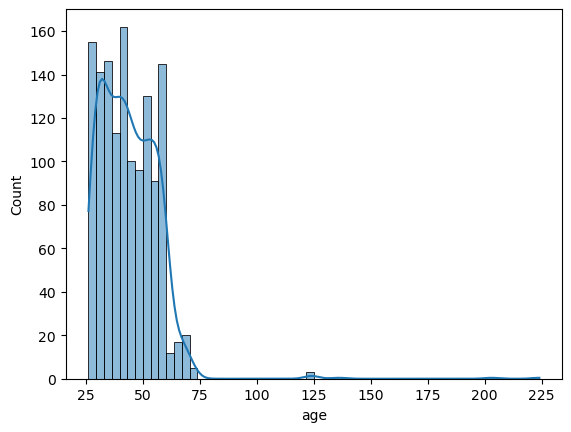

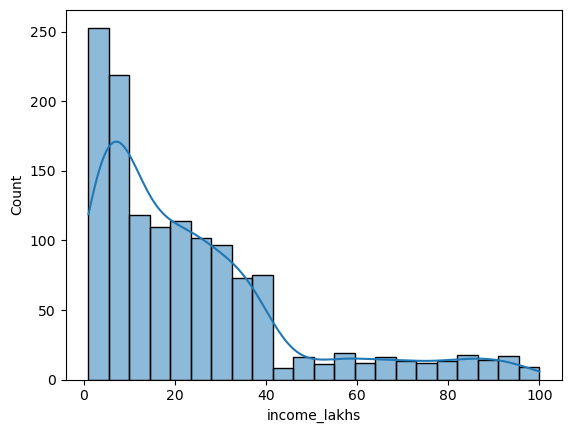

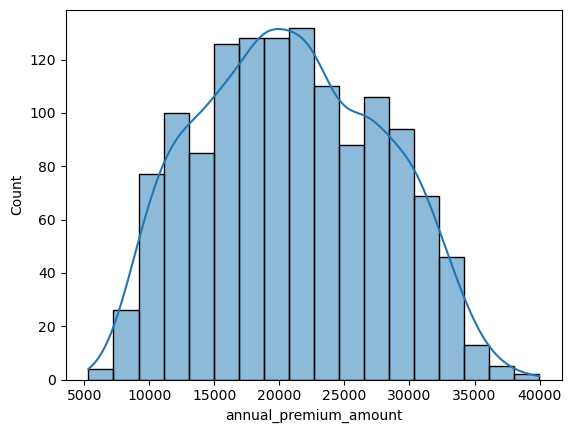

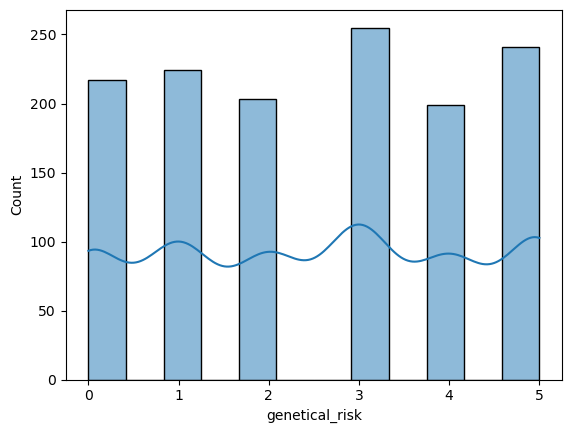

In [12]:
for col in numerical_columns:
    sns.histplot(x = df[col],kde=True)
    plt.show()

In [13]:
categorical_columns = df.select_dtypes(['object']).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history', 'insurance_plan'],
      dtype='object')

In [14]:
per_count = df['gender'].value_counts(normalize=True)
per_count

gender
Male      0.53174
Female    0.46826
Name: proportion, dtype: float64

In [15]:
per_count.index

Index(['Male', 'Female'], dtype='object', name='gender')

In [16]:
per_count.values

array([0.5317401, 0.4682599])

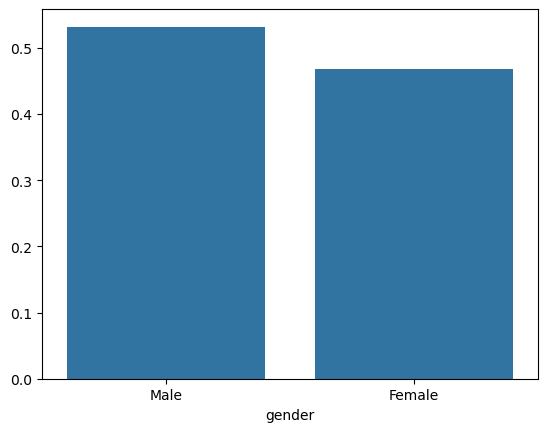

In [17]:
sns.barplot(x=per_count.index, y=per_count.values);

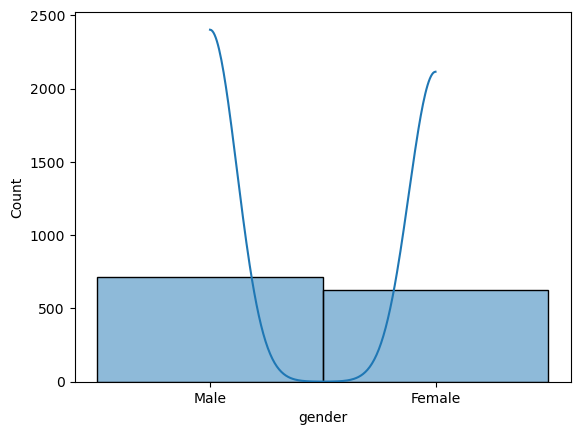

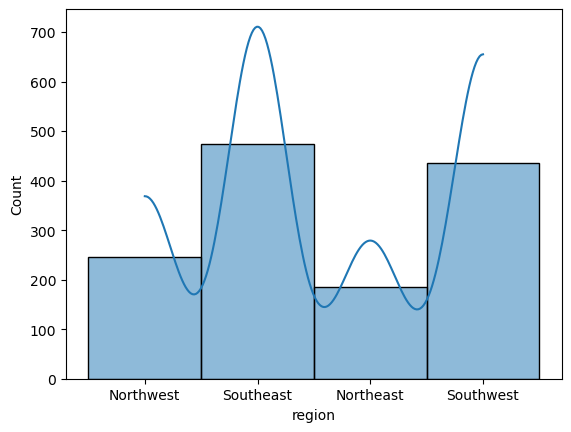

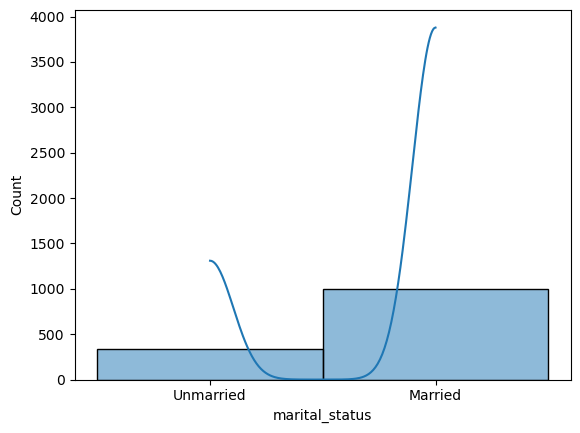

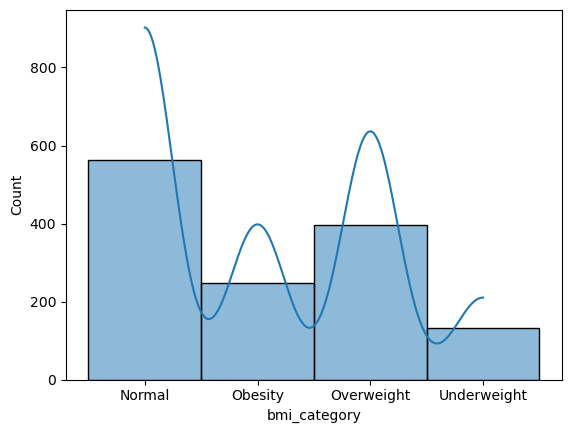

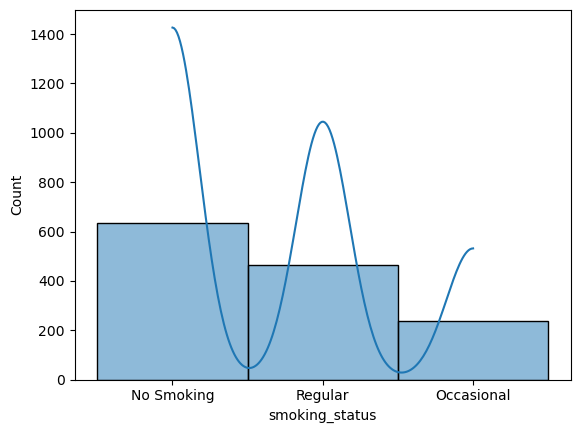

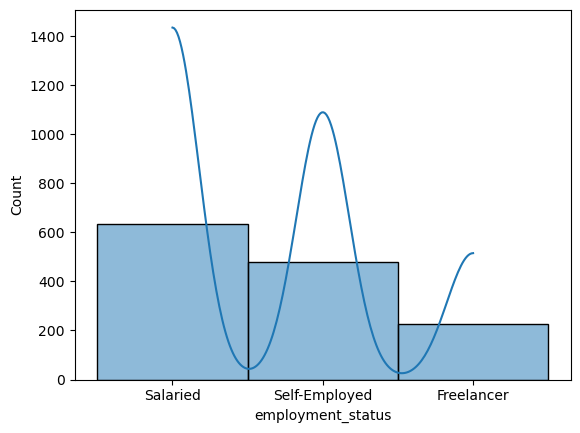

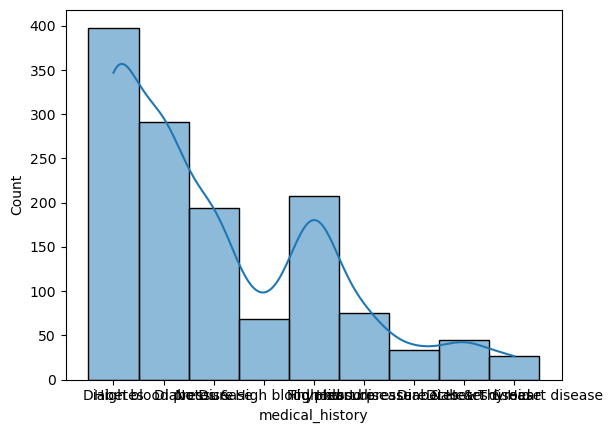

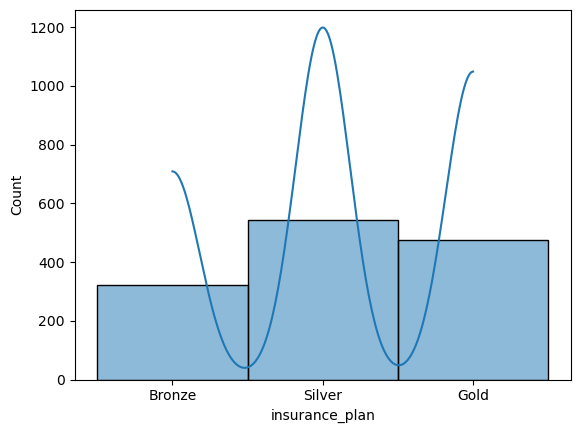

In [18]:
for col in categorical_columns:
    sns.histplot(x = df[col],kde=True)
    plt.show()

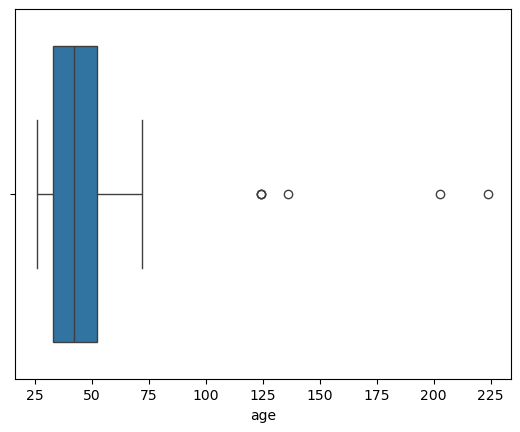

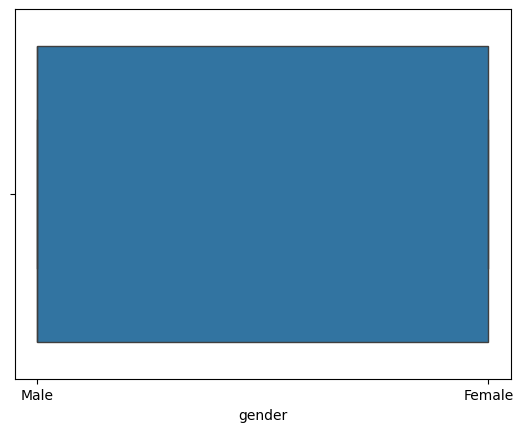

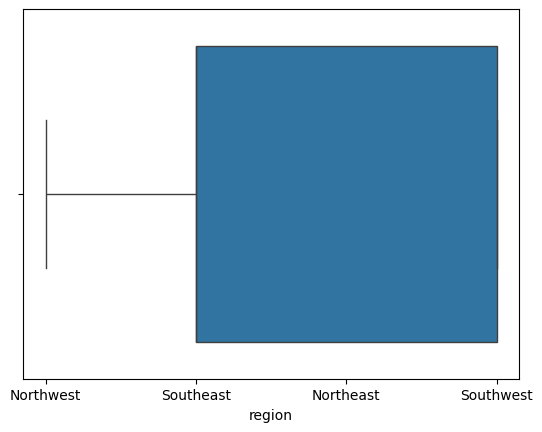

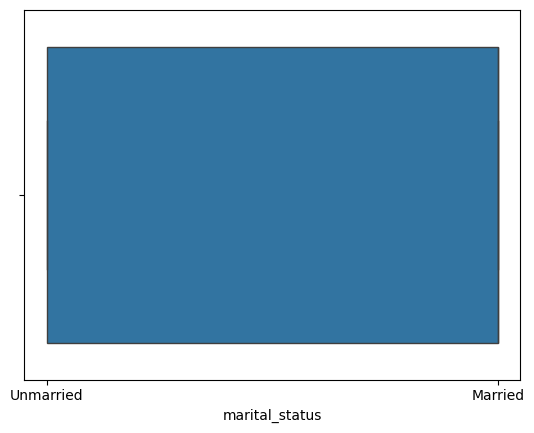

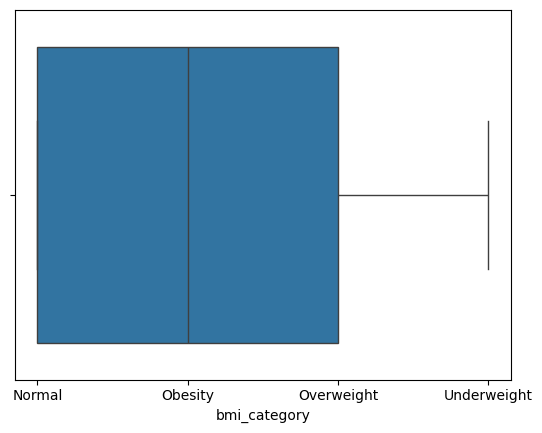

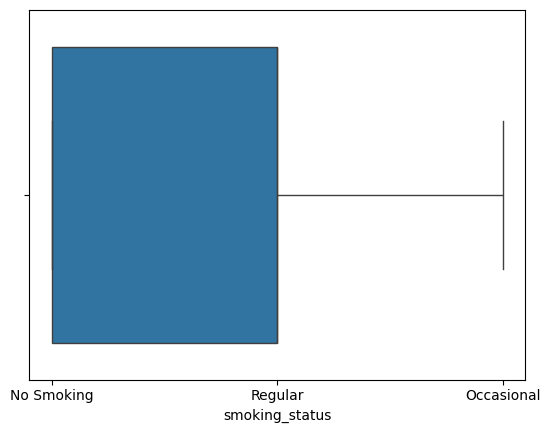

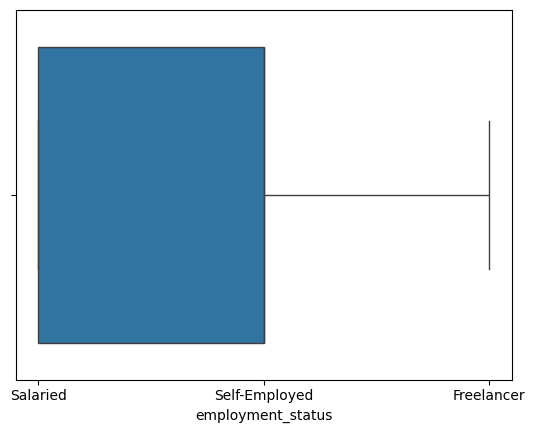

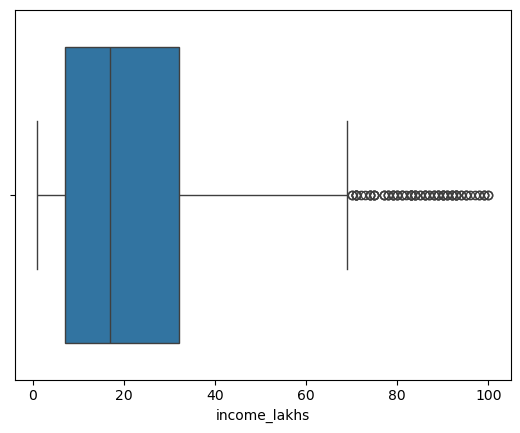

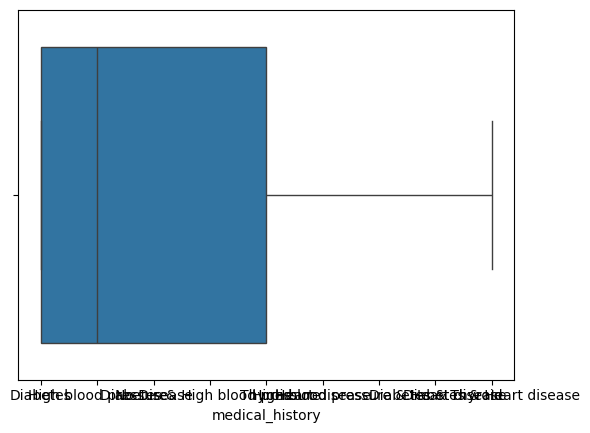

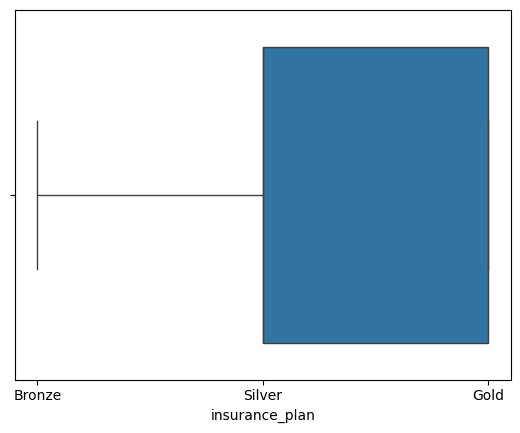

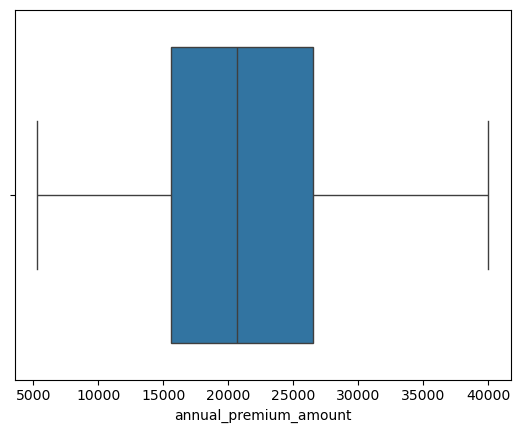

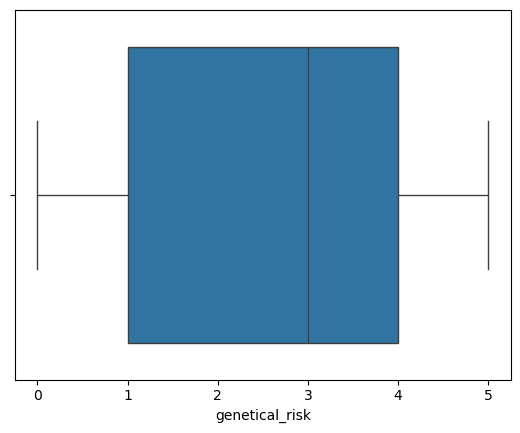

In [19]:
for i in df:
    sns.boxplot(x = df[i])
    plt.show()

In [20]:
def outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    return lower,upper

In [21]:
outliers(df,'income_lakhs')

(-30.5, 69.5)

In [22]:
outliers(df,'age')

(4.5, 80.5)

In [23]:
def outlier_detection(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [24]:
outlier_detection(df, df[['income_lakhs','age']])

<Axes: >

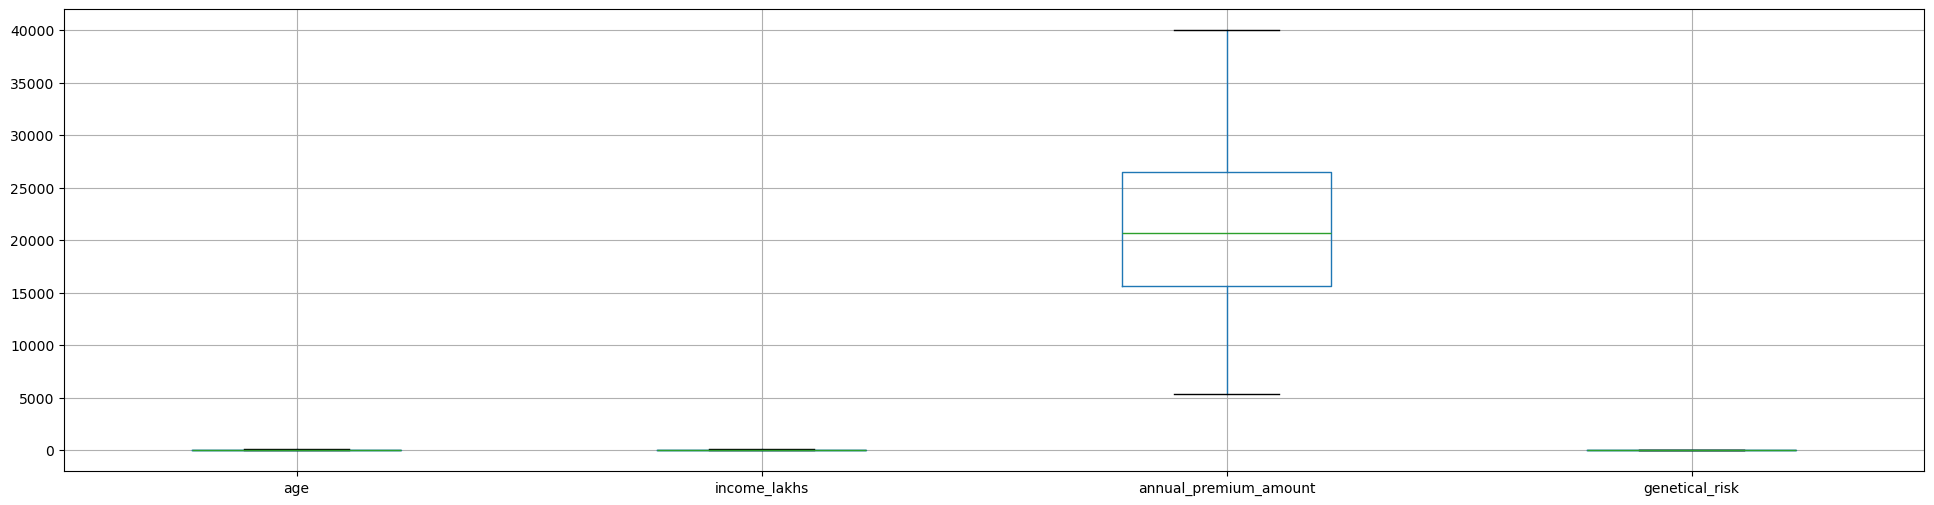

In [25]:
plt.figure(figsize=(24,6))
df.boxplot()

In [26]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})
df['gender'].unique()

array([0, 1], dtype=int64)

In [28]:
df['smoking_status'] = df['smoking_status'].map({'No Smoking':0,'Regular':1,'Occasional':2})
df['smoking_status'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
df['region'].unique()

array(['Northwest', 'Southeast', 'Northeast', 'Southwest'], dtype=object)

In [30]:
df['region'] = df['region'].map({'Northwest':0,'Southeast':1,'Northeast':2,'Southwest':3})
df['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
df['marital_status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [32]:
df['marital_status'] = df['marital_status'].map({'Unmarried':0,'Married':1})
df['marital_status'].unique()

array([0, 1], dtype=int64)

In [33]:
df['bmi_category'].unique()

array(['Normal', 'Obesity', 'Overweight', 'Underweight'], dtype=object)

In [34]:
df['bmi_category'] = df['bmi_category'].map({'Normal':0,'Obesity':1,'Overweight':2,'Underweight':3})
df['bmi_category'].unique()

array([0, 1, 2, 3], dtype=int64)

In [35]:
df['employment_status'].unique()

array(['Salaried', 'Self-Employed', 'Freelancer'], dtype=object)

In [36]:
df['employment_status'] = df['employment_status'].map({'Salaried':0,'Self-Employed':1,'Freelancer':2})
df['employment_status'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
df['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [38]:
df['medical_history'] = df['medical_history'].map({'Diabetes':0,'High blood pressure':1,'No Disease':2,'Diabetes & High blood pressure':3,
                                                   'Thyroid':4,'Heart disease':5,'High blood pressure & Heart disease':6,
                                                   'Diabetes & Thyroid':7,'Diabetes & Heart disease':8})
df['medical_history'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [39]:
df['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [40]:
df['insurance_plan'] = df['insurance_plan'].map({'Bronze':0,'Silver':1,'Gold':2})
df['insurance_plan'].unique()

array([0, 1, 2], dtype=int64)

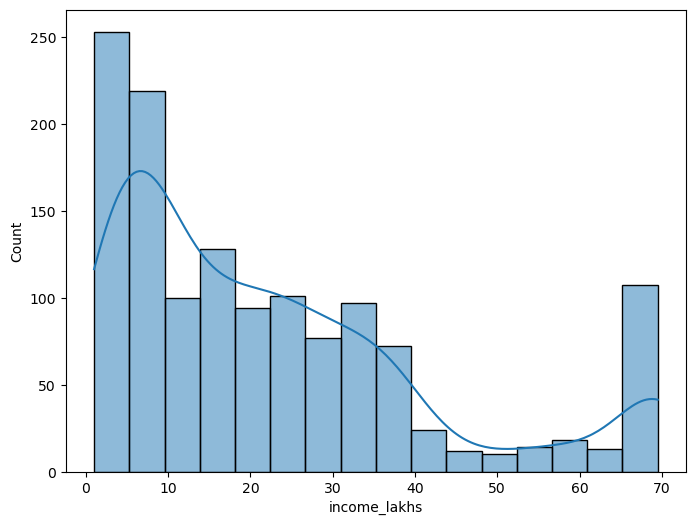

In [62]:
plt.figure(figsize=(8,6))
sns.histplot(x = df['income_lakhs'],kde = True)
plt.show()

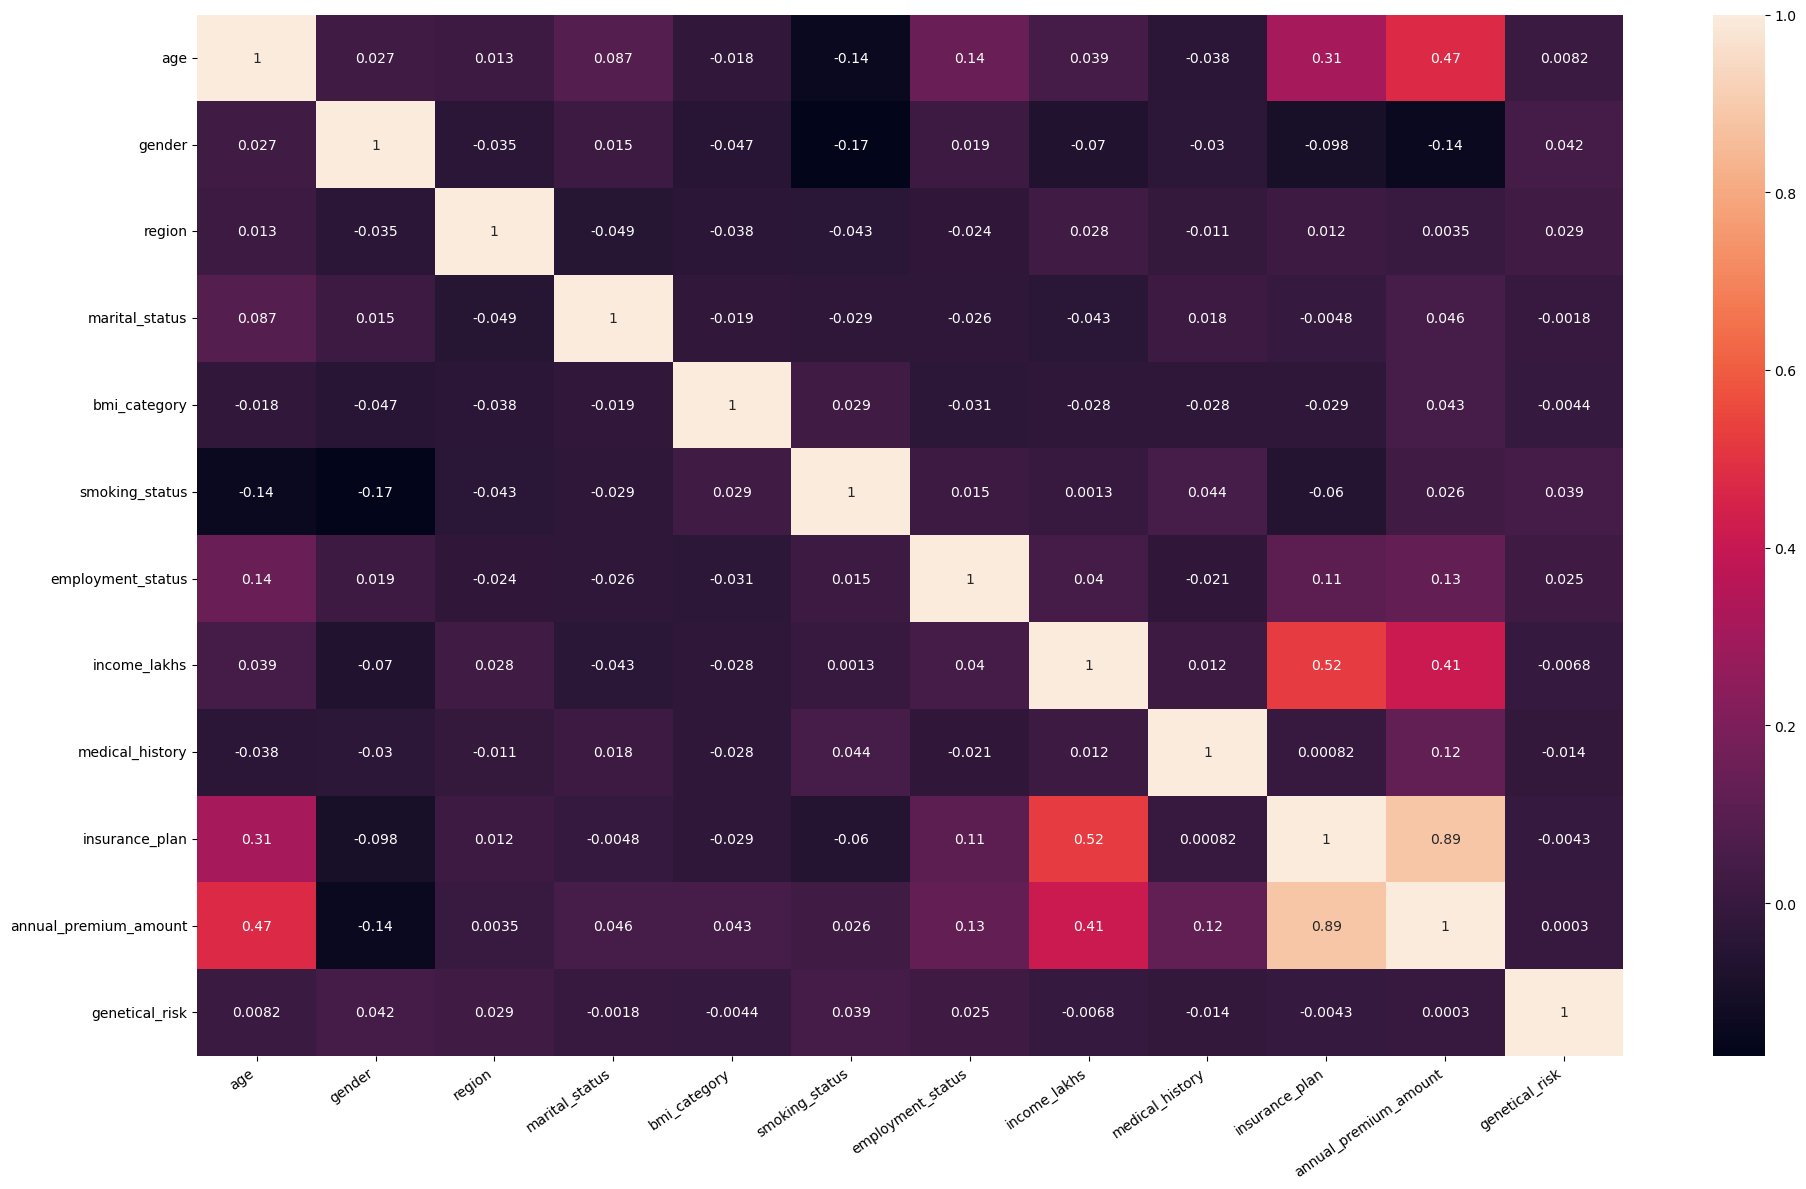

In [63]:
cm = df.corr()
cm

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show();

In [64]:
x = df.drop(columns='annual_premium_amount',axis=1)
y = df['annual_premium_amount']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

              feature       VIF
0                 age  1.177755
1              gender  1.053046
2              region  1.010467
3      marital_status  1.015243
4        bmi_category  1.007639
5      smoking_status  1.059776
6   employment_status  1.032087
7        income_lakhs  1.410054
8     medical_history  1.005810
9      insurance_plan  1.576121
10     genetical_risk  1.005901


Gradient Boosting

In [68]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [69]:
gb_pred = gb_model.predict(X_test)
gb_pred

array([ 9329.08725693, 15941.97744438, 27563.73034155, 32409.70983372,
       16763.71764247, 24177.37261781, 30432.71591412, 18790.45137167,
       11983.18494393, 16014.39312716, 20930.48013146, 16785.86881128,
       22051.74438718, 18785.25085701, 14377.17356996, 15744.86392033,
       15711.79767265, 10089.27336378, 31517.47677489, 13059.34661998,
       29509.73523723, 25105.98840236, 24249.91289547, 23246.01823305,
        9533.04799282, 18532.37941686, 22269.61073717, 33364.19091874,
       33035.07795456, 29776.58782638, 19245.71532248, 17645.52733612,
       15734.51275078, 14750.35297856, 20393.27992762, 21456.36333195,
       23127.39644585, 30324.20795797, 22225.84040259, 11252.81691432,
       25493.28518017, 21387.71839434, 18555.07669327, 19372.58107478,
       26629.56449471, 21335.71442717, 14127.15073598, 15982.6079628 ,
       24879.69900791, 29618.968106  , 13221.25575402, 29509.73523723,
       27285.21638084, 18868.16540142, 29623.33581921, 12292.20302095,
      

In [72]:
train_score = gb_model.score(X_train,y_train)
test_score = gb_model.score(X_test,y_test)
print(train_score,test_score)

0.9967098904789896 0.9849705716206858


In [73]:
# Metrics calculation
mae = mean_absolute_error(y_test, gb_pred)
mse = mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gb_pred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 445.90
Mean Squared Error (MSE): 661055.46
Root Mean Squared Error (RMSE): 813.05
R² Score: 0.98


In [74]:
resi = y_test - gb_pred

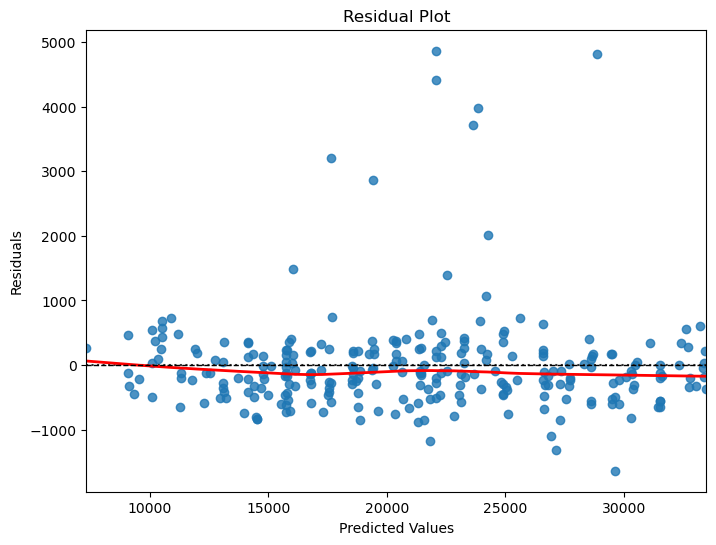

In [75]:
plt.figure(figsize=(8, 6))
sns.residplot(x=gb_pred, y=resi, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

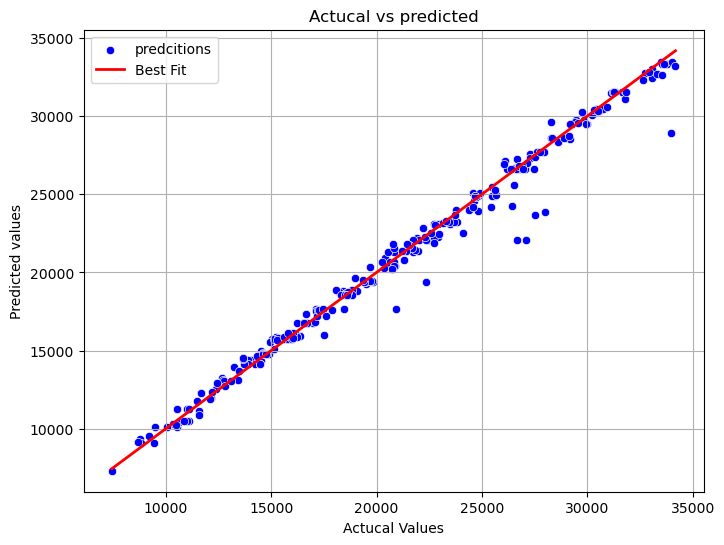

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test,y = gb_pred,color = 'blue',label = 'predcitions')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red',lw = 2,label = 'Best Fit')
plt.xlabel('Actucal Values')
plt.ylabel('Predicted values')
plt.title('Actucal vs predicted')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
#Linear regression

In [78]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [79]:
lr_pred = lr_model.predict(X_test)
lr_pred

array([10319.16978904, 12324.81365368, 30301.50475977, 30566.13919724,
       18014.46838469, 23369.36925602, 27338.16159852, 19826.13438872,
       10380.58833108,  9055.06738382, 19636.25987019, 17460.9873962 ,
       25583.25101064, 20049.91228861, 18499.53680713, 17579.02839776,
       12173.98234333, 10239.90138957, 28872.3257862 ,  8745.04723186,
       27396.06481786, 27477.20182477, 23269.18279551, 20844.79273808,
       10703.68775991, 18877.86751459, 21514.02483744, 28317.01875346,
       30274.45463732, 30576.78808369, 19641.84667237, 17637.9699762 ,
       16503.75618048, 12500.53522086, 18928.78016662, 22212.06402957,
       26365.82099265, 28329.20541994, 25358.88882728, 10001.54141967,
       27821.6505667 , 21643.92465172, 18262.76559672, 15818.5119939 ,
       26197.29224998, 20573.90664502,  8776.39120888, 18427.80973083,
       25874.57414244, 29943.80919007, 15013.65660937, 27576.54735033,
       29221.84478568, 20375.33510124, 30946.01484172, 13365.78965159,
      

In [80]:
train_score = lr_model.score(X_train,y_train)
test_score = lr_model.score(X_test,y_test)
print(train_score,test_score)

0.8629451780536306 0.8509951729317268


In [81]:
# Metrics calculation
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2084.15
Mean Squared Error (MSE): 6553839.03
Root Mean Squared Error (RMSE): 2560.05
R² Score: 0.85


In [82]:
res = y_test - lr_pred

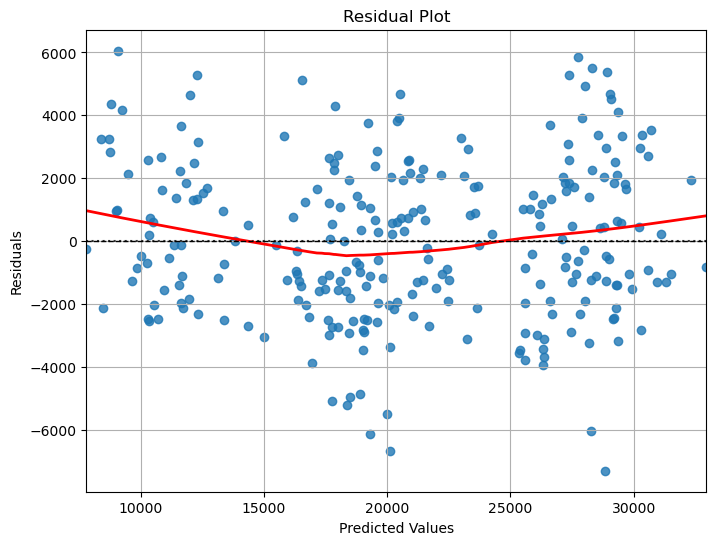

In [83]:
plt.figure(figsize=(8, 6))
sns.residplot(x=lr_pred, y=res, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

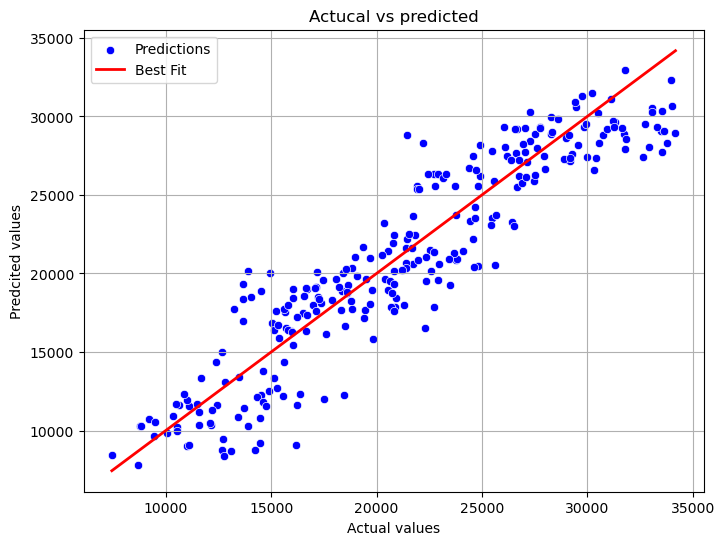

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test,y = lr_pred, color = 'blue', label = 'Predictions')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red',lw = 2,label = 'Best Fit')
plt.xlabel('Actual values')
plt.ylabel('Predcited values')
plt.title('Actucal vs predicted')
plt.grid(True)
plt.legend()
plt.show()

In [86]:
#Ada boost

In [87]:
model_ada = AdaBoostRegressor(learning_rate=0.01)
model_ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.01)

In [88]:
ypred = model_ada.predict(X_test)
ypred

array([11657.53070175, 14912.60465116, 29529.90821256, 29629.28504673,
       18850.3745583 , 22264.87179487, 29527.86574074, 21538.7972028 ,
       11657.53070175, 11824.72321429, 21538.7972028 , 18850.3745583 ,
       23362.36363636, 21538.7972028 , 18865.85017422, 18850.3745583 ,
       11868.64435146, 11585.67555556, 29545.50209205, 11824.72321429,
       29536.06532663, 23362.36363636, 21538.7972028 , 21538.7972028 ,
       11824.72321429, 18850.3745583 , 18940.03202847, 29545.50209205,
       29615.99038462, 29545.50209205, 18865.85017422, 18865.85017422,
       18850.3745583 , 11824.72321429, 18865.85017422, 21538.7972028 ,
       26103.41176471, 29545.50209205, 23428.15873016, 11824.72321429,
       26165.66666667, 21538.7972028 , 18850.3745583 , 18865.85017422,
       29517.18719212, 18996.39666667, 11824.72321429, 18850.3745583 ,
       26154.52307692, 33317.79166667, 14912.60465116, 29536.06532663,
       29527.86574074, 18850.3745583 , 29550.97409326, 11657.53070175,
      

In [89]:
train_score = model_ada.score(X_train,y_train)
test_score = model_ada.score(X_test,y_test)
print(train_score,test_score)

0.8741283009087889 0.8544049728836692


In [90]:
# Metrics calculation
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2097.95
Mean Squared Error (MSE): 6403862.14
Root Mean Squared Error (RMSE): 2530.59
R² Score: 0.85


In [99]:
rs = y_test - ypred

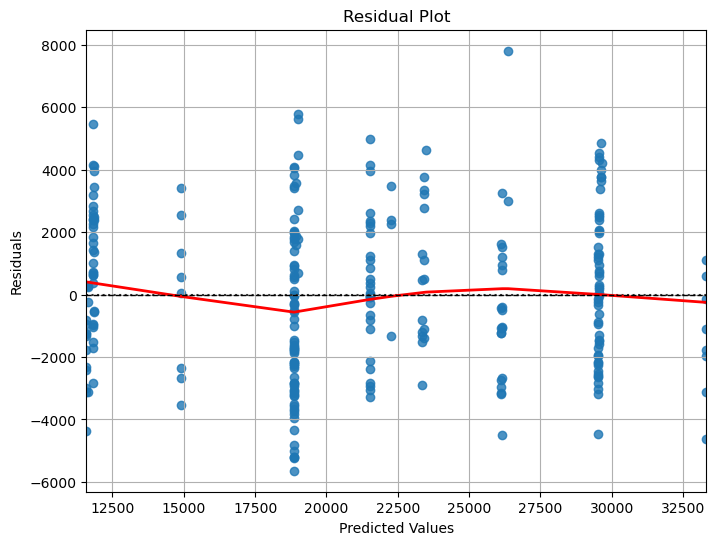

In [100]:
plt.figure(figsize=(8, 6))
sns.residplot(x=ypred, y=rs, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

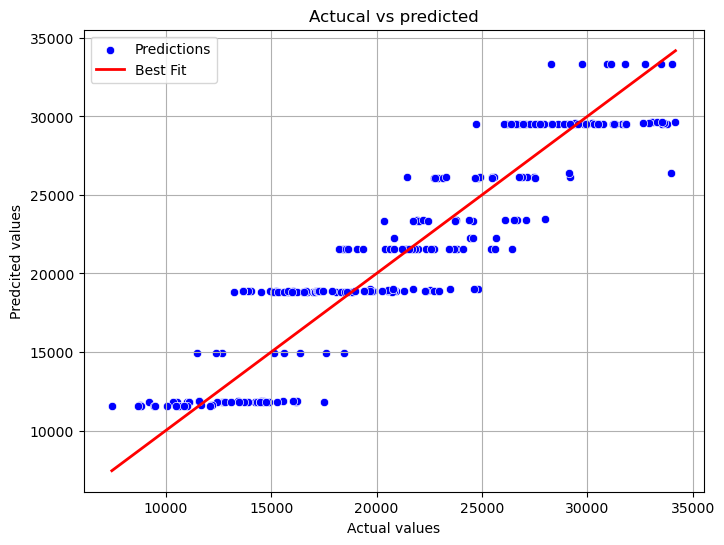

In [101]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test,y = ypred, color = 'blue', label = 'Predictions')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red',lw = 2,label = 'Best Fit')
plt.xlabel('Actual values')
plt.ylabel('Predcited values')
plt.title('Actucal vs predicted')
plt.grid(True)
plt.legend()
plt.show()

In [181]:
#final model

In [150]:
model = Pipeline(steps=[
    ('model', GradientBoostingRegressor(learning_rate=0.1))  # XGBoost model
])

In [151]:
model.fit(X_train,y_train)

Pipeline(steps=[('model', GradientBoostingRegressor())])

In [152]:
ypred = model.predict(X_test)
ypred

array([ 9329.08725693, 15941.97744438, 27563.73034155, 32409.70983372,
       16763.71764247, 24177.37261781, 30432.71591412, 18790.45137167,
       11983.18494393, 16014.39312716, 20930.48013146, 16785.86881128,
       22051.74438718, 18785.25085701, 14377.17356996, 15744.86392033,
       15711.79767265, 10089.27336378, 31517.47677489, 13059.34661998,
       29509.73523723, 25105.98840236, 24249.91289547, 23246.01823305,
        9533.04799282, 18532.37941686, 22269.61073717, 33364.19091874,
       33035.07795456, 29776.58782638, 19245.71532248, 17645.52733612,
       15734.51275078, 14750.35297856, 20393.27992762, 21456.36333195,
       23127.39644585, 30324.20795797, 22225.84040259, 11252.81691432,
       25493.28518017, 21387.71839434, 18555.07669327, 19372.58107478,
       26629.56449471, 21335.71442717, 14127.15073598, 15982.6079628 ,
       24879.69900791, 29618.968106  , 13221.25575402, 29509.73523723,
       27285.21638084, 18868.16540142, 29623.33581921, 12292.20302095,
      

In [153]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score, test_score)

0.9967098904789896 0.9849705716206858


In [154]:
# Metrics calculation
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 445.90
Mean Squared Error (MSE): 661055.46
Root Mean Squared Error (RMSE): 813.05
R² Score: 0.98


In [155]:
residuals = y_test - ypred

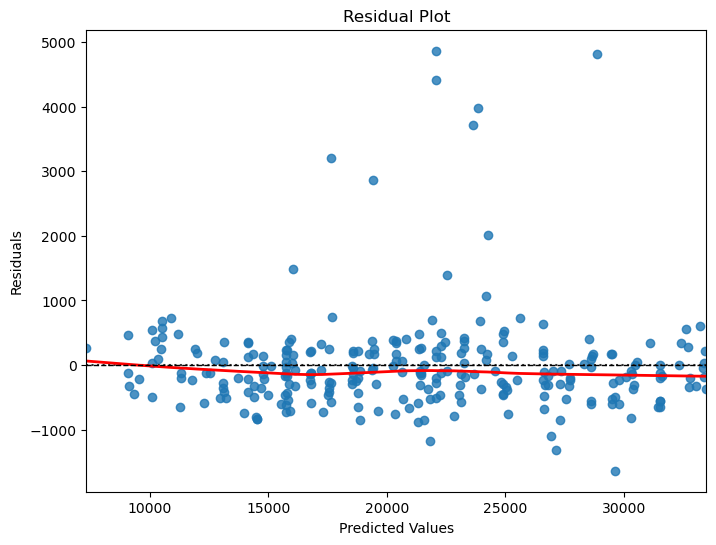

In [156]:
plt.figure(figsize=(8, 6))
sns.residplot(x=ypred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

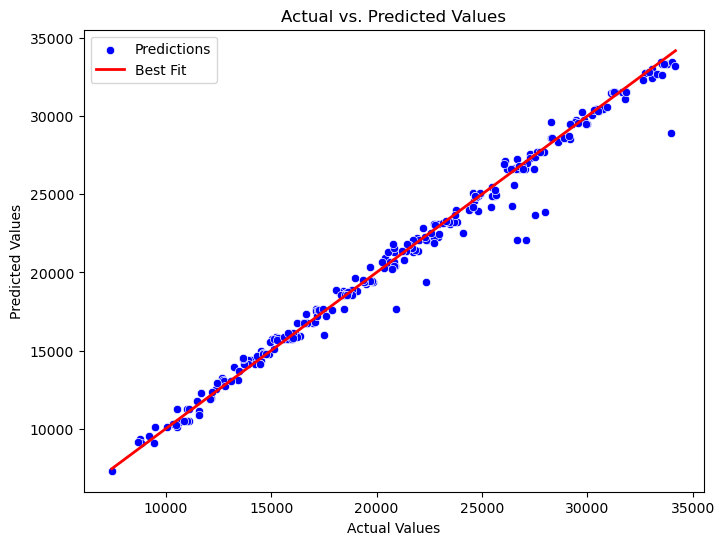

In [157]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ypred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Best Fit')  # Reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [158]:
pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))
])

# Parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
Best Score: 0.9960238235153994


In [160]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('model',
                 GradientBoostingRegressor(n_estimators=300, random_state=42))])

In [130]:
import joblib

with open('zor.pkl', 'wb') as f:
    joblib.dump(best_model, f)

In [ ]:
#python -m streamlit run app.py